In [1]:
!pip install langchain
!pip install transformers
!pip install -U langchain langchain-community
!pip install -U langchain-huggingface
!pip install --upgrade langchain langchain-core





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.49
    Uninstalling langchain-core-0.3.49:
      Successfully uninstalled langchain-core-0.3.49
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.7
    Uninstalling langchain-text-splitters-0.3.7:
      Successfully uninstalled langchain-text-splitters-0.3.7
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.22
    Uninstalling langchain-0.3.22:
      Successfully uninstalled langchain-0.3.22
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from transformers import pipeline
from langchain import LLMChain, PromptTemplate
from langchain_community.llms import HuggingFaceHub
import matplotlib.pyplot as plt


In [3]:
#convert an image to text using an image captioning model
def img2text(url):
  pipe = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
  text = pipe(url)[0]["generated_text"]
  return text

In [4]:
print(img2text("zwm.png"))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


a pile of cardboard boxes


In [5]:
from langchain_huggingface import HuggingFaceEndpoint

repo_id = "tiiuae/falcon-7b-instruct"
hf_token = " # Replace with your actual token"

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    huggingfacehub_api_token=hf_token,
    temperature=0.1,
    max_new_tokens=1500,
    verbose=False
)


In [14]:
from langchain_core.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEndpoint
import os
import textwrap

# Set your Hugging Face token
os.environ["HUGGINGFACEHUB_API_TOKEN"] = " # Replace with your actual token"

# Create LLM with parameters passed explicitly
llm = HuggingFaceEndpoint(
    repo_id="tiiuae/falcon-7b-instruct",
    task="text-generation",
    temperature=0.7,
    max_new_tokens=300
)

# Define the prompt
prompt = PromptTemplate.from_template(
    "Write a detailed, suspenseful story based on this scenario:\n\n{scenario}"
)

# Create the runnable chain using the pipe operator
chain = prompt | llm

# Your input scenario
scenario = "A boy was in depression because he was not getting jobs."

# Invoke the chain
response = chain.invoke({"scenario": scenario})

# Combine scenario and response
full_story = scenario + " " + response

# Wrap the full story for better formatting
wrapped_story = textwrap.fill(full_story, width=100)

# Print the result
print("Generated Story:\n")
print(wrapped_story)


Generated Story:

A boy was in depression because he was not getting jobs.  One day, while walking in the park, he saw
a job posting board that read, 'Wanted: Psychopath for top-secret government project'. Intrigued by
the title, he decided to apply. The interview process was intense, with the interviewer asking
twisted questions to gauge the applicant's mental state. The boy was nervous and kept fidgeting, but
he managed to answer all the questions correctly. After the interview, he was told to wait for a
call. Days went by, and he heard nothing. Finally, one evening, his phone rang. An unknown number
was calling, and when he picked up, a chilling voice said, 'You have been selected. You will be
contacted soon.' With that, the phone hung up. The boy was petrified. What was the government
project, and what did it entail? Was he in danger? Was he making a huge mistake by agreeing to this
job offer? These thoughts haunted him day and night, and he couldn't make a decision until he
receiv

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


In [7]:
import requests

def text2speech(text, lang_code="eng"):  # default: English
    API_URL = f"https://router.huggingface.co/hf-inference/models/facebook/mms-tts-{lang_code}"
    headers = {"Authorization": "Bearer  # Replace with your actual token"}

    response = requests.post(API_URL, headers=headers, json={"inputs": text})

    if response.status_code == 200:
        return response.content
    else:
        print("TTS Error:", response.status_code, response.text)
        return None


In [8]:
from langchain_core.prompts import PromptTemplate

def generate_story(scenario, llm):
    prompt = PromptTemplate.from_template(
        "Write a detailed, suspenseful story based on this scenario:\n\n{scenario}"
    )
    chain = prompt | llm
    return chain.invoke({"scenario": scenario})


Device set to use cuda:0


Image Caption: a squirrel eating a nut on a moss covered ground


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


**Generated Story:**


A sudden gust of wind made the trees sway, causing a small squirrel to lose its balance and fall from a branch. As it struggled to regain its footing, it noticed a moss-covered ground beneath it, and the temptation of a free meal proved too great. With a daring leap, the squirrel made it to the ground, but as it looked around, it realized that something was not quite right. The sky darkened, and a faint whisper of thunder could be heard in the distance. The squirrel's heart raced as it scurried away, its eyes filled with fear, unsure of what awaited it in the shadows.

HTML(value='<b>Click the button below to download the audio file (optional):</b>')

Button(button_style='success', description='Download Audio 🎧', style=ButtonStyle())

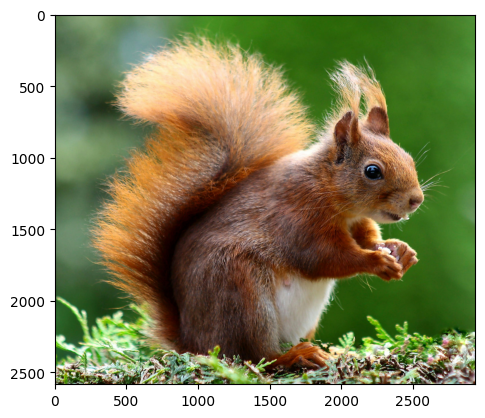

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from IPython.display import Audio, display, Markdown
import ipywidgets as widgets
from google.colab import files
import matplotlib.pyplot as plt

# Display the image
img_file = "pic3.jpg"
img = plt.imread(img_file)
plt.imshow(img)

# Generate image caption (scenario)
scenario = img2text(img_file)
print("Image Caption:", scenario)

# Generate story from scenario
story = generate_story(scenario, llm)
display(Markdown(f"**Generated Story:**\n\n{story}"))

# Convert story to speech
audio_bytes = text2speech(story)

if audio_bytes:
    # Save the audio temporarily
    audio_filename = "story_audio.wav"
    with open(audio_filename, "wb") as f:
        f.write(audio_bytes)

    # Play the audio
    display(Audio(audio_filename))

    # Create a download button (only if user clicks)
    def download_audio(b):
        files.download(audio_filename)

    download_button = widgets.Button(description="Download Audio 🎧", button_style='success')
    download_button.on_click(download_audio)

    display(widgets.HTML("<b>Click the button below to download the audio file (optional):</b>"))
    display(download_button)
else:
    print("No audio generated.")
